<a href="https://colab.research.google.com/github/niroshank/data-mining-models/blob/master/Section_D_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

In [0]:
# Import dataset
digits=load_digits()

**Visualize the data**

<Figure size 432x288 with 0 Axes>

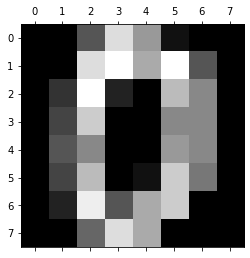

In [0]:
# First image --> 8x8 image of integer pixels in the range 0..16.
import pylab as pl
pl.gray()
pl.matshow(digits.images[0])
pl.show()

**Data preprocessing**

In [0]:
# Split the dataset into targets and inputs
inputs = digits.images
targets = digits.target

In [0]:
# Nomalize the input dataset. inputs of the dataset is ranging from 0 to 16 pixels. So divide the all the inputs from 16
normalized_inputs = inputs / 16.0

In [0]:
normalized_inputs[0]

array([[0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ],
       [0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ],
       [0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ],
       [0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ],
       [0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ],
       [0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ]])

In [0]:
# 20% for testing and 80% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_inputs, targets, test_size=0.2)
print("Shape of training images: " + str(X_train.shape))
print("Shape of training targets: " + str(y_train.shape))
print("Shape of testing images: " + str(X_test.shape))
print("Shape of testing targets " + str(y_test.shape))

Shape of training images: (1437, 8, 8)
Shape of training targets: (1437,)
Shape of testing images: (360, 8, 8)
Shape of testing targets (360,)


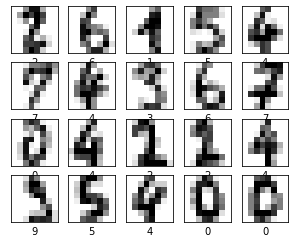

In [0]:
# Vizualise the first 20 images
plt.figure(figsize=(5,5))
for i in range(20):
  plt.subplot(5,5,i+1) # at a row only 05 images, then move to next row
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(digits.target_names[y_train[i]])
plt.show()

In [0]:
# Sequential model, since our CNN will be a linear stack of layers
model = tf.keras.models.Sequential()

In [0]:
# Sequential model must need a input shape, so we add it into the Conv2D
# Once this input shape is specified, Keras will automatically infer the shapes of inputs for later layers.
model.add(
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(3,3),
        strides=(1,1),
        activation='relu',
        input_shape=(8,8,1)
    )
)
# To down-sample an input representation
# Max pooling process with 2X2 filters and 2 strides.
model.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2,2),
        strides=(2,2)
    )
)
# Transforms the matrix of features into a vector
model.add(
    tf.keras.layers.Flatten()
)
# The output relu layer has 128 nodes, one for each class.
model.add(
    tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)
# The output relu layer has 10 nodes, one for each class.
# Softmax for multi class classification -- 10 classes
model.add(
    tf.keras.layers.Dense(
        units=10,
        activation='softmax'
    )
)
# build the model
# Before training, configure the training process. Need to decide 3 key factors during the compilation step:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss func categorical because of more than 2 classes (10 classes)
    optimizer=tf.keras.optimizers.Adam(), # the Adam gradient-based optimizer
    metrics=['accuracy'] # reporting metric - since this is a classification problem accuracy metric is suitable
)
# display the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 16)          160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               18560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 20,010
Trainable params: 20,010
Non-trainable params: 0
_________________________________________________________________


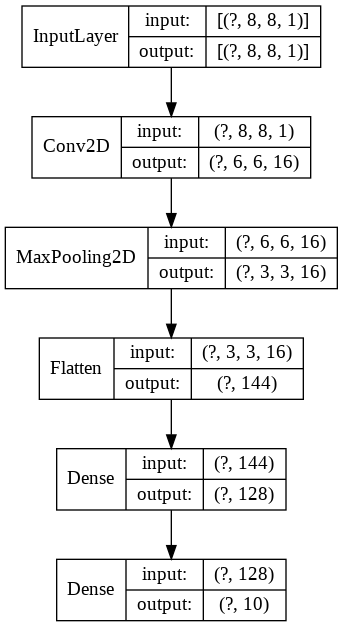

In [0]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [0]:
# Reshape the features (1437, 8, 8),'(360, 8, 8)' to '(1437, 8, 8, 1)','(360, 8, 8, 1)' training and testing respectively.
x_train=np.expand_dims(X_train,-1)
x_test= np.expand_dims(X_test,-1)

#Train the CNN on the training data
history = model.fit(
    x_train,y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
5/5 [==============================] - 0s 42ms/step - loss: 2.2932 - accuracy: 0.1506 - val_loss: 2.2553 - val_accuracy: 0.2153
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 2.2073 - accuracy: 0.3246 - val_loss: 2.1876 - val_accuracy: 0.4340
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 2.1276 - accuracy: 0.5500 - val_loss: 2.1087 - val_accuracy: 0.6632
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 2.0392 - accuracy: 0.6841 - val_loss: 2.0205 - val_accuracy: 0.6944
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 1.9365 - accuracy: 0.7676 - val_loss: 1.9156 - val_accuracy: 0.7465
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 1.8206 - accuracy: 0.8085 - val_loss: 1.8010 - val_accuracy: 0.7812
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 1.6891 - accuracy: 0.8494 - val_loss: 1.6564 - val_accuracy: 0.8194
Epoch 8/10
5/5 [===========

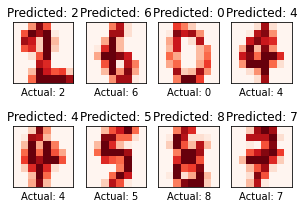

In [0]:
#Display the first 8 correcly classified images from the test data set
correct=np.nonzero(predicted_classes==y_test)[0]
plt.figure(figsize=(5,3.5))
for j, correct in enumerate(correct[0:8]):
   plt.subplot(2,4, j+1) #adjust the plot to displat first 8 images  (2X4) <-- this is for the plot area adjustment
   plt.xticks([])
   plt.yticks([])
   plt.imshow(x_test[correct].reshape(8, 8), cmap="Reds")
   plt.title("Predicted: {}".format(target_names[predicted_classes[correct]]))
   plt.xlabel("Actual: {}" .format(target_names[y_test[correct]]))

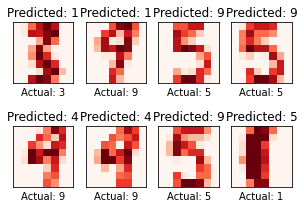

In [0]:
#Display the first 8 incorrecly classified images from the test data set
incorrect=np.nonzero(predicted_classes!=y_test)[0]
plt.figure(figsize=(5,3.5))
for j, incorrect in enumerate(incorrect[0:8]):
   plt.subplot(2,4, j+1) #adjust the plot to displat first 8 images  (2X4) <-- this is for the plot area adjustment
   plt.xticks([])
   plt.yticks([])
   plt.imshow(x_test[incorrect].reshape(8, 8), cmap="Reds")
   plt.title("Predicted: {}".format(target_names[predicted_classes[incorrect]]))
   plt.xlabel("Actual: {}" .format(target_names[y_test[incorrect]]))

In [0]:
# Evaluate the model on the test data.
# On test data model got 89% accuracy which is a good performance, while it hit the 1.1% loss.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1719354391098022
Test accuracy: 0.8972222208976746
